In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv')
dados

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170
...,...,...,...
2152,0,80,7518
2153,1,52,1332
2154,0,40,473
2155,0,75,5324


In [3]:
renomeia = {'unfinished': 'nao_finalizado', 'expected_hours': 'estimativa', 'price': 'preco'}
dados = dados.rename(columns= renomeia)


In [4]:
dados

,nao_finalizado,estimativa,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170
...,...,...,...
2152,0,80,7518
2153,1,52,1332
2154,0,40,473
2155,0,75,5324


In [5]:
troca = {0:1,
        1:0}

In [6]:
dados['finalizado'] = dados.nao_finalizado.map(troca)
dados

,nao_finalizado,estimativa,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0
...,...,...,...,...
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1


In [7]:
import seaborn as sns

<AxesSubplot:xlabel='estimativa', ylabel='preco'>

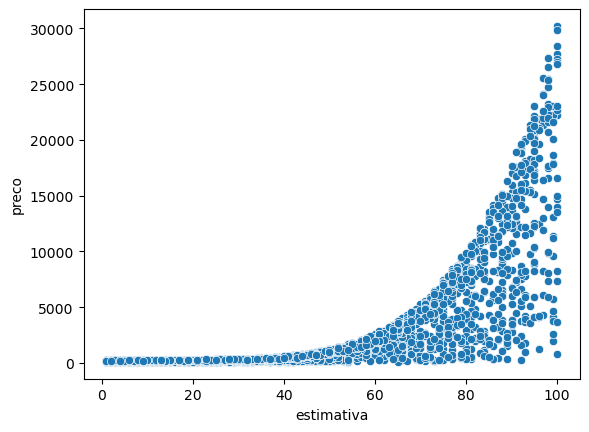

In [8]:
    sns.scatterplot(x = 'estimativa', y = 'preco', data = dados)

<AxesSubplot:xlabel='estimativa', ylabel='preco'>

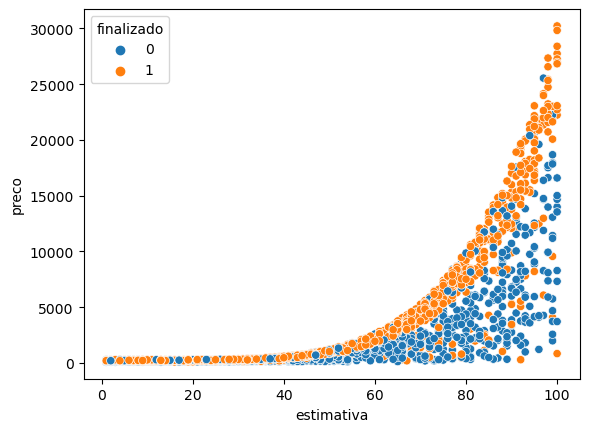

In [9]:
    sns.scatterplot(x = 'estimativa',hue= 'finalizado', y = 'preco', data = dados)

In [10]:
x = dados[['estimativa', 'preco']]
y = dados['finalizado']

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 2

treino_x, teste_x, treino_y,teste_y = train_test_split(x,y,random_state= SEED, test_size= 0.25,
                                                      stratify = y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC(random_state= SEED)
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 54.63%


/home/estevaolins/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [12]:
import numpy as np
baseline_estimate = np.ones(540 )
acuracia_teste = accuracy_score(teste_y, baseline_estimate) * 100
print("A acurácia teste foi %.2f%%" % acuracia_teste)


A acurácia teste foi 52.59%


In [13]:
##definir pixel e identificar margem de erro do grafico

In [14]:
x_min = teste_x.estimativa.min()
x_max = teste_x.estimativa.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(x_min,x_max, y_min, y_max)

1 100 100 30223


### Entre x_min e x_max, cada espaço terá o tamanho máximo do gráfico dividido pelo total de pixels ((x_max - x_min)/pixels.

In [15]:
pixels = 100
np.arange(x_min, x_max,(x_max - x_min)/pixels)

array([ 1.  ,  1.99,  2.98,  3.97,  4.96,  5.95,  6.94,  7.93,  8.92,
        9.91, 10.9 , 11.89, 12.88, 13.87, 14.86, 15.85, 16.84, 17.83,
       18.82, 19.81, 20.8 , 21.79, 22.78, 23.77, 24.76, 25.75, 26.74,
       27.73, 28.72, 29.71, 30.7 , 31.69, 32.68, 33.67, 34.66, 35.65,
       36.64, 37.63, 38.62, 39.61, 40.6 , 41.59, 42.58, 43.57, 44.56,
       45.55, 46.54, 47.53, 48.52, 49.51, 50.5 , 51.49, 52.48, 53.47,
       54.46, 55.45, 56.44, 57.43, 58.42, 59.41, 60.4 , 61.39, 62.38,
       63.37, 64.36, 65.35, 66.34, 67.33, 68.32, 69.31, 70.3 , 71.29,
       72.28, 73.27, 74.26, 75.25, 76.24, 77.23, 78.22, 79.21, 80.2 ,
       81.19, 82.18, 83.17, 84.16, 85.15, 86.14, 87.13, 88.12, 89.11,
       90.1 , 91.09, 92.08, 93.07, 94.06, 95.05, 96.04, 97.03, 98.02,
       99.01])

In [16]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/ pixels)
eixo_y = np.arange(y_min, y_max,(y_max - y_min)/pixels)

In [17]:
print(eixo_x)

[ 1.    1.99  2.98  3.97  4.96  5.95  6.94  7.93  8.92  9.91 10.9  11.89
 12.88 13.87 14.86 15.85 16.84 17.83 18.82 19.81 20.8  21.79 22.78 23.77
 24.76 25.75 26.74 27.73 28.72 29.71 30.7  31.69 32.68 33.67 34.66 35.65
 36.64 37.63 38.62 39.61 40.6  41.59 42.58 43.57 44.56 45.55 46.54 47.53
 48.52 49.51 50.5  51.49 52.48 53.47 54.46 55.45 56.44 57.43 58.42 59.41
 60.4  61.39 62.38 63.37 64.36 65.35 66.34 67.33 68.32 69.31 70.3  71.29
 72.28 73.27 74.26 75.25 76.24 77.23 78.22 79.21 80.2  81.19 82.18 83.17
 84.16 85.15 86.14 87.13 88.12 89.11 90.1  91.09 92.08 93.07 94.06 95.05
 96.04 97.03 98.02 99.01]


In [18]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
xx.ravel()

array([ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01])

In [19]:
pontos = np.c_[xx.ravel(), yy.ravel()]

In [20]:
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [21]:
z = modelo.predict(pontos)
z = z.reshape(xx.shape)
z

/home/estevaolins/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [22]:
print(z.shape, xx.shape, yy.shape)

(100, 100) (100, 100) (100, 100)


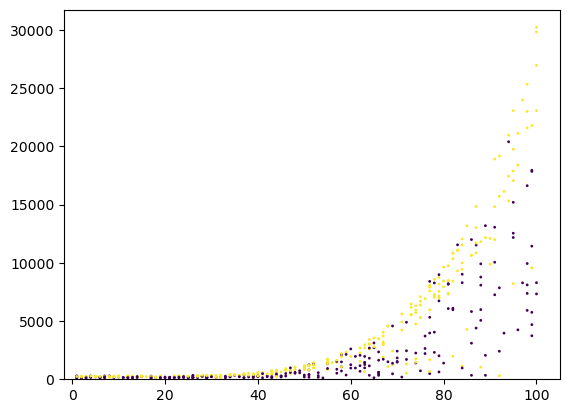

In [98]:
plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(teste_x.estimativa, teste_x.preco, c=teste_y, s=1)


## Importação da outra biblioteca SKlearn.svm.SVC

In [96]:
from sklearn.svm import SVC
SEED = 5
np.random.seed(SEED)
treino_x,teste_x, treino_y, teste_y = train_test_split(x, y, test_size= 0.25,
                                                      stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))
modelo = SVC(gamma = 'auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 59.07%


/home/estevaolins/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


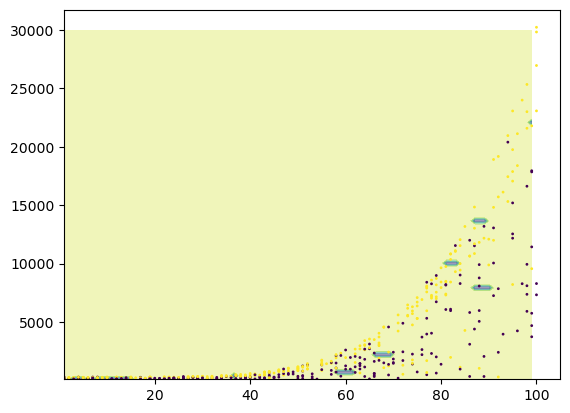

In [100]:
x_min = teste_x.estimativa.min()
x_max = teste_x.estimativa.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.estimativa, teste_x.preco, c=teste_y, s=1)

In [93]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
SEED = 5
np.random.seed(SEED)
raw_treino_x,raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size= 0.25,
                                                      stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100



acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 66.85%


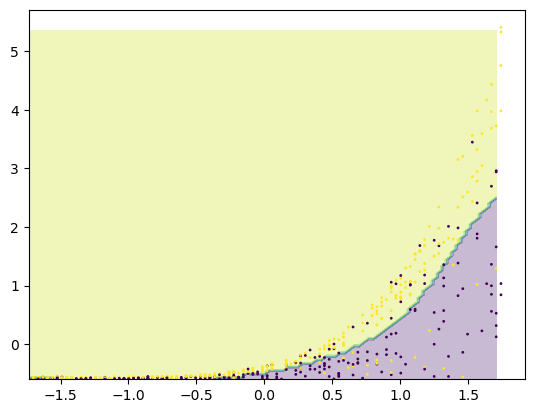

In [94]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]
x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1)

,estimativa,preco
562,36,264
85,100,7327
507,92,7852
1624,95,17058
822,45,281
...,...,...
102,82,1973
1012,73,6464
484,77,683
1079,62,2277
